R2 Score: 0.4526027629719195
Mean Squared Error: 2900.1936284934814
Mean Absolute Error: 42.79409467959994
Intercept: 151.34560453985995
Explained Variance Score: 0.4554925102890146


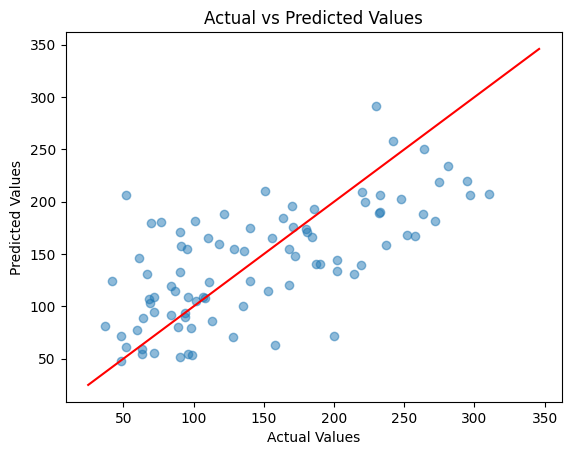

In [2]:
# Use a standard-library implementation as a validator

import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt

diabetes = load_diabetes()
diabetes_data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# 'target' = diabetes progression 1 year from now
diabetes_data['target'] = diabetes.target

diabetes_data.head()

X = diabetes_data.drop('target', axis=1)
y = diabetes_data['target']
X.shape, y.shape


# we want to train the model to map first 353 samples (80%) to corresponding targets, then predict the target values for the remaining 89 samples (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

model = LinearRegression()
model.fit(X_train, y_train, sample_weight=None) # fit finds the best-fitting line that minimizes the sum of squared residuals
predicted = model.predict(X_test) # predict the target values for the remaining 89 samples

# Evaluate the model
r2 = r2_score(y_test, predicted) # compares the model's predictions to the mean of the target values
mse = mean_squared_error(y_test, predicted) # measures the average of the squares of the errors
evs = explained_variance_score(y_test, predicted) # measures the extent to which a mathematical model accounts for the variation of a given data set
mae = mean_absolute_error(y_test, predicted) # measures the average of the absolute errors
intercept = model.intercept_ # the point where the line crosses the y-axis

# Print all
print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Intercept: {intercept}")
print(f"Explained Variance Score: {evs}")

# Plot the predicted target values (x-axis) against the actual values (y-axis)
# If the model is a good fit, the points should be close to the line y=x, indicating a strong linear relationship
plt.scatter(y_test, predicted, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()